## Exploration for Claim 2: ##
    Comparing mean Sale Price for homes based on outdoor space
    no outdoor space
    open porch
    enclosed porch
    deck

### Make necessary imports

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

#from ltests import model

### Import our combined csv into a DataFrame

In [150]:
raw = pd.read_csv('../../data/master.csv', low_memory=False, dtype={'id': object})

In [151]:
#how many entries are there?
raw.shape[0]

62039

### We would like to select only those entries that have a sale price greater than 0

In [152]:
raw = raw[raw.SalePrice > 0]
raw.shape[0]

42214

### Now we select the sales with the proper PropertyType codes
The following are of interest to us:
 - 11: Household, single family units
  
*These codes can be found in the Lookup.zip file located at*

https://info.kingcounty.gov/assessor/DataDownload/default.aspx 

In [153]:
proptypes = [11]

df = raw[raw.PropertyType.isin(proptypes)]
df.shape[0]


19264

In [154]:
#set the target to column index 0
cols = list(df.columns)
cols = [cols[3]] + cols[:3] + cols[4:]
df = df[cols]
df.head()

,SalePrice,id,ExciseTaxNbr,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
2,485500,0001000042,3018323,10/29/2019,20191031001228,,,,,,...,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254
8,358308,0001000067,2979287,03/18/2019,20190327000321,,,,,,...,0.0,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736
11,850000,0001200008,2991776,05/17/2019,20190604001211,,,,,,...,0.0,1.0,1964.0,0.0,0.0,0.0,0.0,4.0,0.0,0.072488
22,465000,0002000015,3022128,11/19/2019,20191122001296,,,,,,...,0.0,1.0,1961.0,0.0,0.0,0.0,0.0,5.0,0.0,0.086336
36,350000,0003000086,2995868,06/18/2019,,,,,,,...,0.0,0.0,1948.0,0.0,0.0,0.0,0.0,4.0,0.0,0.081522


In [155]:
#filling in NaN with zero
#assuming they are NaN because there is no porch or deck

df['SqFtOpenPorch'] = df['SqFtOpenPorch'].fillna(0)
df['SqFtEnclosedPorch'] = df['SqFtEnclosedPorch'].fillna(0)
df['SqFtDeck'] = df['SqFtDeck'].fillna(0)

In [156]:
#add column for Outdoor space
# if OutdoorSpace = zero, there is no proch or deck
df['OutdoorSpace']= df['SqFtOpenPorch']+df['SqFtEnclosedPorch']+df['SqFtDeck']

## Removed outliers. 

set minimum price threshold at \\$200,000.

set maximum price threshold at \\$9,000,000.

notes from meeting with Joél-
made decision based on hist and box plots ... unreadable becasue of outliers
df.describe
founf 75% threshold (9mil)
minimum threshold based on quick Zillow search for home prices in KC
not thorough investigation. Could be more accurate by rearching a Zillow data set or web scraping.

In [157]:
df = df[(df.SalePrice<9000000)& (df.SalePrice>=200000)]
df.shape[0]

19094

### Calculate the Mean Sale Price for Each category

In [158]:
deck = df[df.SqFtDeck > 0]
print(f'''There are {deck.SalePrice.count()} houses. 
      The mean Sale Price is {round(deck.SalePrice.mean(),2)}.
      ''')

There are 8810 houses. 
      The mean Sale Price is 867140.53.
      


In [159]:
open_porch = df[df.SqFtOpenPorch > 0]
print(f'''There are {open_porch.SalePrice.count()} houses. 
      The mean Sale Price is {round(open_porch.SalePrice.mean(),2)}.
     ''')

There are 9420 houses. 
      The mean Sale Price is 907577.68.
     


In [160]:
encl_porch = df[df.SqFtEnclosedPorch > 0]
print(f'''There are {encl_porch.SalePrice.count()} houses.
      The mean Sale Price is {round(encl_porch.SalePrice.mean(),2)}.
     ''')

There are 794 houses.
      The mean Sale Price is 771770.65.
     


In [161]:
no_out = df[df.OutdoorSpace == 0]
print(f'''There are {no_out.SalePrice.count()} houses.
      The mean Sale Price is {round(no_out.SalePrice.mean(),2)}.
     ''')

There are 4513 houses.
      The mean Sale Price is 625368.78.
     


In [162]:
yes_out = df[df.OutdoorSpace > 0]
print(f'''There are {yes_out.SalePrice.count()} houses.
      The mean Sale Price is {round(yes_out.SalePrice.mean(),2)}.
     ''')

There are 14581 houses.
      The mean Sale Price is 846023.32.
     


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
sample = no_out.SalePrice.sample(n=1000, random_state=3)

# Population mean
mu = no_out.SalePrice.mean()

#Sample mean
x_bar = sample.mean()

# Sample standard deviation
sigma = np.std(sample,ddof=1)

#Sample size (n)
n= len(sample)

#Degrees of Freedom
df = n-1

#Difference in sample mean
diff = x_bar-mu

#The findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, 'and a standard deviation' ,sigma, 'with', df, 'degrees of freedom. The difference between the sample and population mean is:', diff)

The sample contains 1000 observations, having a mean of 640505.103 and a standard deviation 448682.86677539314 with 999 degrees of freedom. The difference between the sample and population mean is: 15136.319707290037


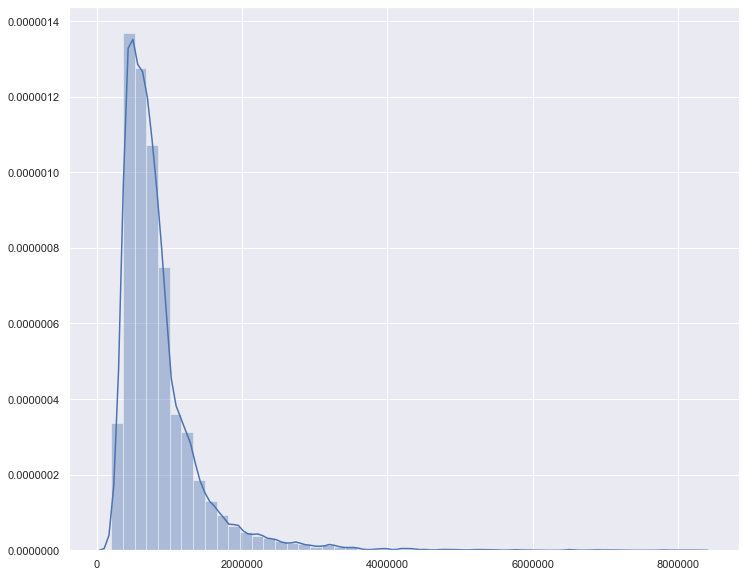

In [165]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(yes_out.SalePrice.values)

In [102]:
control = no_out.SalePrice.values
exper = yes_out.SalePrice.values

In [104]:
stats.ttest_ind(yes_set, no_set, equal_var=False)

Ttest_indResult(statistic=15.724866426845598, pvalue=1.1639242532430853e-54)